In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [156]:
df = pd.read_csv("/Users/syedowez/Documents/laptop_price_prediction/laptop_data.csv")

In [157]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [158]:
print(df.shape)

(1303, 12)


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [160]:
df.duplicated().sum()

0

In [161]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [162]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [163]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [164]:
df['Ram'] =df['Ram'].astype('int32')
df['Weight'] =df['Weight'].astype('float32')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [166]:
import seaborn as sns

/var/folders/d6/qb76rn9134795g1p3g8gwrf00000gn/T/ipykernel_1499/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

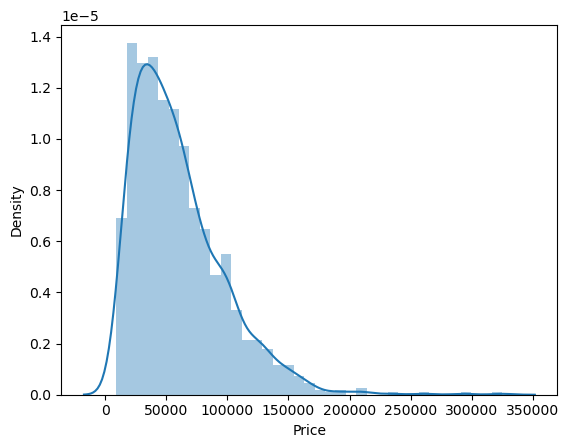

In [167]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

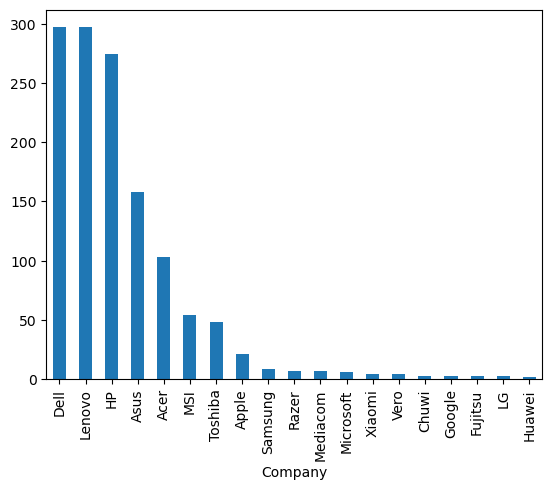

In [168]:
df['Company'].value_counts().plot(kind='bar')

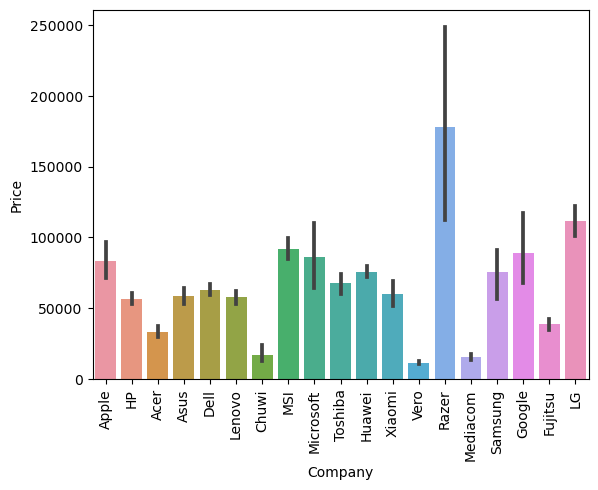

In [169]:
# price variations according to brand 
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

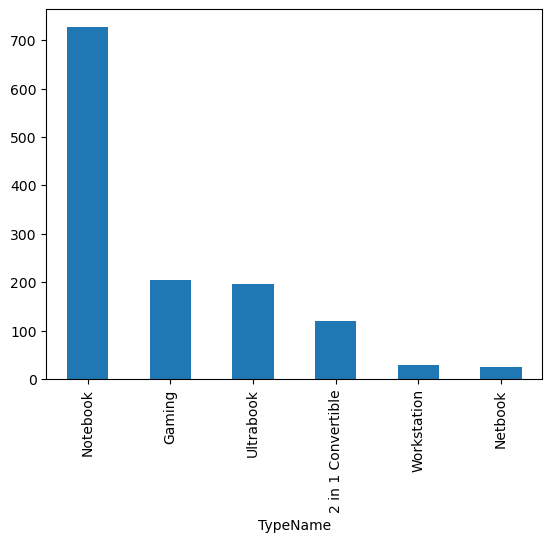

In [170]:
# Number of laptops for each type 
df['TypeName'].value_counts().plot(kind='bar')

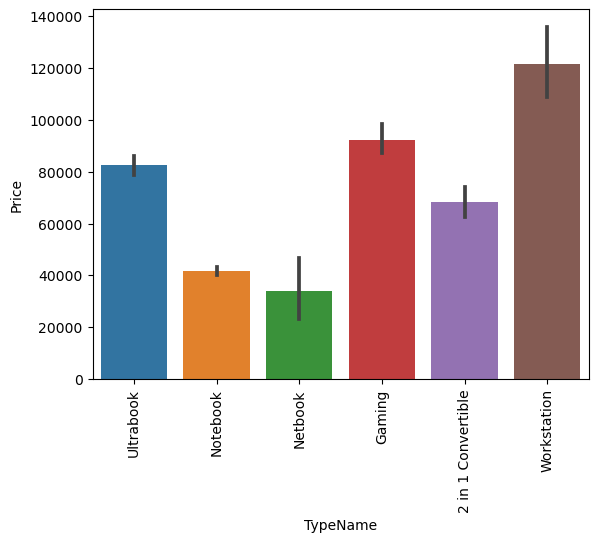

In [171]:
# price variations according to Laptop-Type 
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

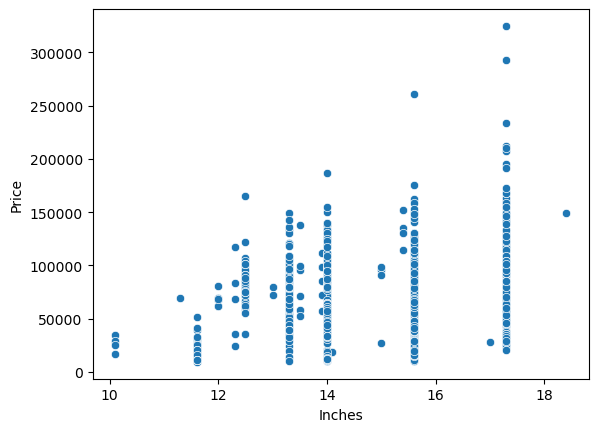

In [172]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [173]:
df['Touch_screen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


<Axes: xlabel='Touch_screen'>

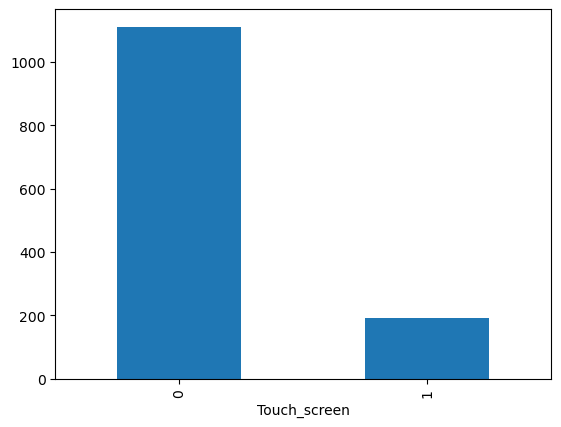

In [174]:
df['Touch_screen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touch_screen', ylabel='Price'>

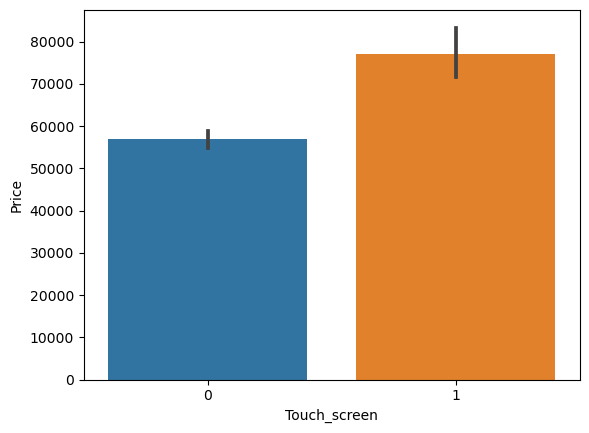

In [175]:
sns.barplot(x=df['Touch_screen'], y = df['Price']) 


In [176]:
df['Ips']  = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<Axes: xlabel='Ips'>

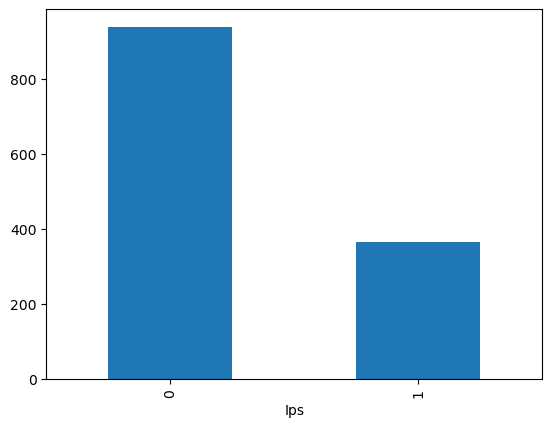

In [177]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

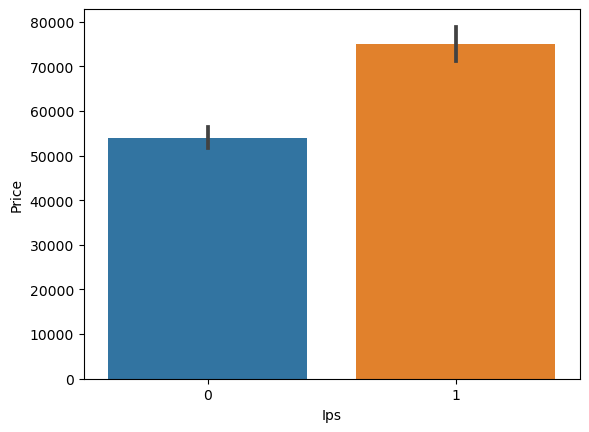

In [178]:
sns.barplot(x=df['Ips'], y = df['Price'])

In [179]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [180]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [181]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [182]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [183]:
df['x_res'] = df['x_res'].astype('int32')
df['y_res'] = df['y_res'].astype('int32')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touch_screen      1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [185]:
df['ppi'] = ((df['x_res'] ** 2 + df['y_res'] ** 2) ** 0.5 / df['Inches'] ).astype('float')

In [186]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Price']
print(correlation)


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch_screen    0.191226
Ips             0.252208
x_res           0.556529
y_res           0.552809
ppi             0.473487
Name: Price, dtype: float64


In [187]:
df.drop(columns = ['ScreenResolution', 'x_res', 'y_res', 'Inches'], inplace = True)

In [188]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [189]:
df['Cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [190]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,ppi,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [191]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i3' or text == 'Intel Core i7':
        return text 
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [192]:
df['Cpu_brand'] = df['Cpu_name'].apply(fetch_processor)

In [193]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

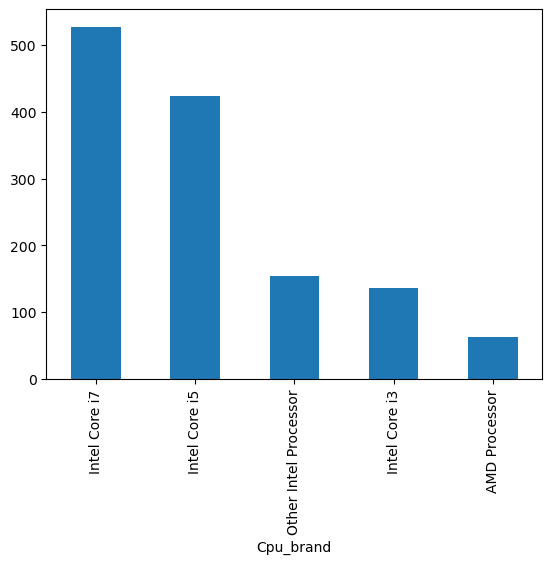

In [194]:
df['Cpu_brand'].value_counts().plot(kind='bar')

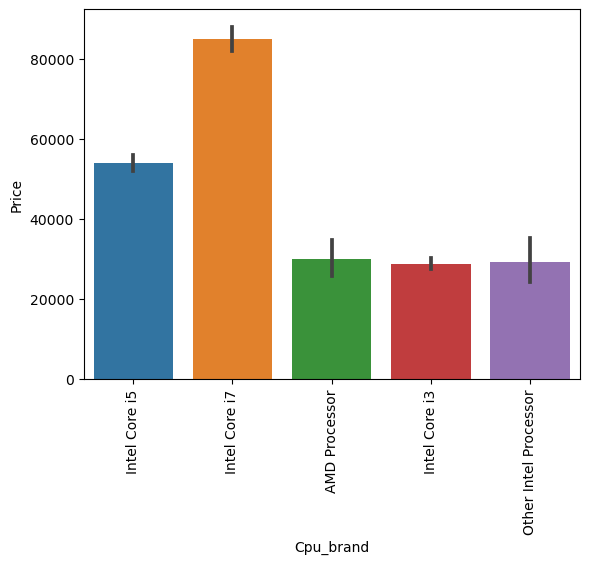

In [195]:
sns.barplot(x=df['Cpu_brand'], y=df['Price']) 
plt.xticks(rotation='vertical') 
plt.show()

<Axes: xlabel='Ram'>

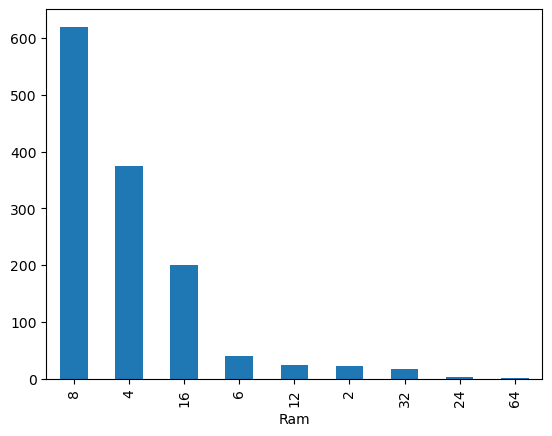

In [196]:
df['Ram'].value_counts().plot(kind='bar')

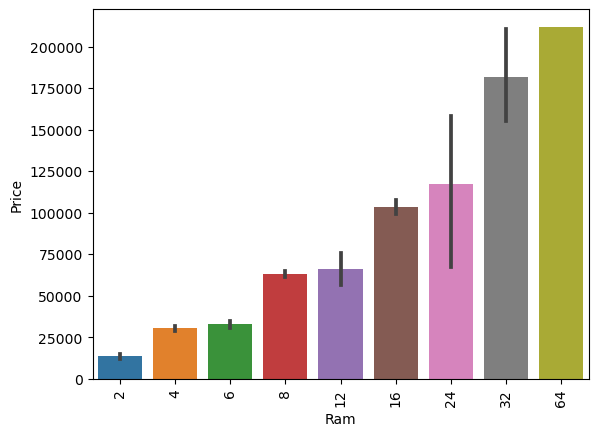

In [197]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [198]:
df['Memory' ] = df['Memory' ].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace( 'GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0] 
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply (lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first' ] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)




In [199]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)




In [200]:
# Remove non-digit characters from 'first' and 'second'
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert the cleaned strings to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Compute new storage columns
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 
                 'Layer2Flash_Storage'], inplace=True)


In [201]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
59,Asus,Notebook,Intel Core i3 6006U 2GHz,4,256 SSD,Intel HD Graphics 520,Linux,2.00,22111.20,0,0,141.211998,Intel Core i3,Intel Core i3,0,256,0,0
216,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,1000 HDD,Nvidia GeForce GTX 940MX,No OS,2.80,31381.92,0,0,106.113062,Intel Core i5,Intel Core i5,1000,0,0,0
402,Lenovo,Notebook,Intel Core i5 8250U 1.6GHz,8,256 SSD + 1000 HDD,AMD Radeon RX 550,Windows 10,2.10,60978.96,0,1,141.211998,Intel Core i5,Intel Core i5,1000,256,0,0
411,Lenovo,Ultrabook,Intel Core i7 7700HQ 2.8GHz,8,512 SSD,Nvidia GeForce GT 940MX,Windows 10,1.70,103523.04,0,1,209.800683,Intel Core i7,Intel Core i7,0,512,0,0
606,Toshiba,Notebook,Intel Core i7 6500U 2.5GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,2.20,74538.72,0,1,141.211998,Intel Core i7,Intel Core i7,0,256,0,0
37,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,128 SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.80,52161.12,0,1,127.335675,Intel Core i5,Intel Core i5,1000,128,0,0
1064,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,102777.12,0,0,141.211998,Intel Core i7,Intel Core i7,1000,256,0,0
1249,Dell,2 in 1 Convertible,Intel Core i5 7Y54 1.2GHz,8,256 SSD,Intel HD Graphics 615,Windows 10,1.24,96596.64,1,0,276.053530,Intel Core i5,Intel Core i5,0,256,0,0
718,Mediacom,Notebook,Intel Atom Z8350 1.92GHz,4,32 HDD,Intel HD Graphics 400,Windows 10,1.40,14119.20,0,1,161.725391,Intel Atom Z8350,Other Intel Processor,32,0,0,0
479,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.05,89084.16,0,1,165.632118,Intel Core i5,Intel Core i5,0,256,0,0


In [202]:
# finding correlation of price by only including numeric columns 
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touch_screen     0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [203]:
df.drop(columns = ['Flash_Storage', 'Hybrid'], inplace = True)

In [204]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256


In [205]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [206]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [207]:
df = df[df['Gpu_Brand'] != 'ARM']

In [208]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

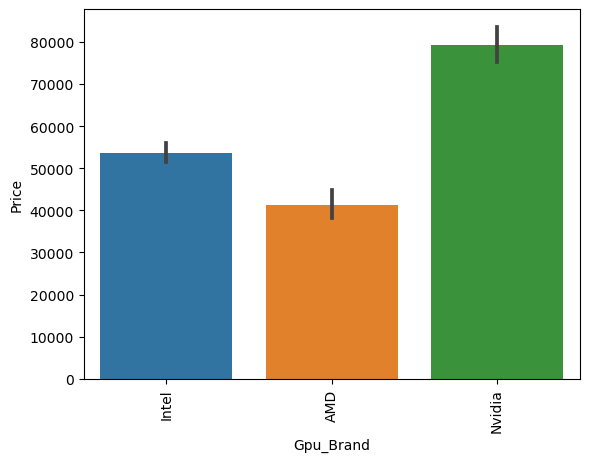

In [209]:
sns.barplot(x=df['Gpu_Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [210]:
df.drop(columns=['Gpu'], inplace=True)

In [211]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [212]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows' 
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac' 
    else:
        return "Others/No Os/Linux"
    

In [213]:
df['os'] = df['OpSys'].apply(cat_os)

In [214]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand,HDD,SSD,Gpu_Brand,os
547,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,1000 HDD,No OS,2.15,24634.008,0,0,141.211998,Intel Core i5,Intel Core i5,1000,0,Intel,Others/No Os/Linux
318,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Windows 10,1.95,52214.400,0,0,157.350512,Intel Core i5,Intel Core i5,0,256,Intel,Windows
927,HP,Notebook,Intel Core i5 6200U 2.3GHz,8,256 SSD,Windows 10,2.31,62071.200,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Windows
1110,HP,Notebook,Intel Core M 6Y54 1.1GHz,8,256 SSD,Windows 10,1.16,90522.720,1,0,276.053530,Intel Core M,Other Intel Processor,0,256,Intel,Windows
961,Lenovo,Ultrabook,Intel Core i5 7300U 2.6GHz,8,256 SSD,Windows 10,1.36,93772.800,0,1,176.232574,Intel Core i5,Intel Core i5,0,256,Intel,Windows
1193,Apple,Ultrabook,Intel Core M 1.1GHz,8,256 Flash Storage,Mac OS X,0.92,61964.640,0,1,226.415547,Intel Core M,Other Intel Processor,0,0,Intel,Mac
472,Google,Ultrabook,Intel Core i5 7Y57 1.2GHz,8,128 SSD,Chrome OS,1.10,67932.000,1,0,234.507400,Intel Core i5,Intel Core i5,0,128,Intel,Others/No Os/Linux
1258,Lenovo,Notebook,Intel Core i7 6500U 2.5GHz,8,1000 Hybrid,Windows 7,2.32,47685.600,0,0,141.211998,Intel Core i7,Intel Core i7,0,0,AMD,Windows
351,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,256 SSD,Windows 10,1.84,69477.120,0,0,141.211998,Intel Core i7,Intel Core i7,0,256,Intel,Windows
113,HP,Notebook,Intel Core i5 8250U 1.6GHz,4,500 HDD,Windows 10,1.63,38468.160,0,1,111.935204,Intel Core i5,Intel Core i5,500,0,Intel,Windows


In [215]:
df.drop(columns = ['OpSys'], inplace= True)

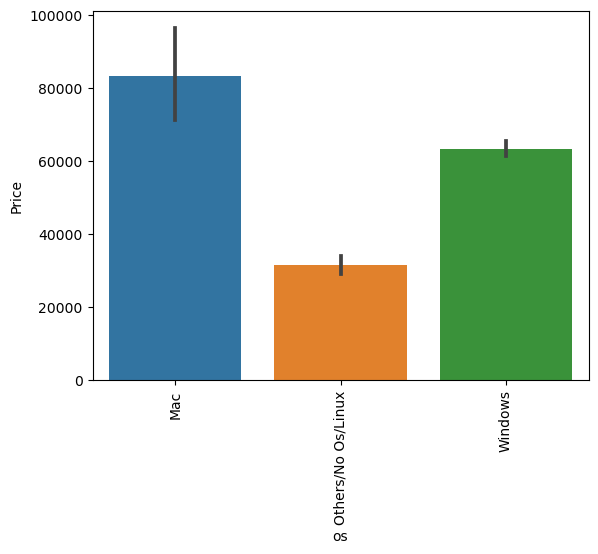

In [216]:
sns.barplot(x=df['os'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/var/folders/d6/qb76rn9134795g1p3g8gwrf00000gn/T/ipykernel_1499/1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

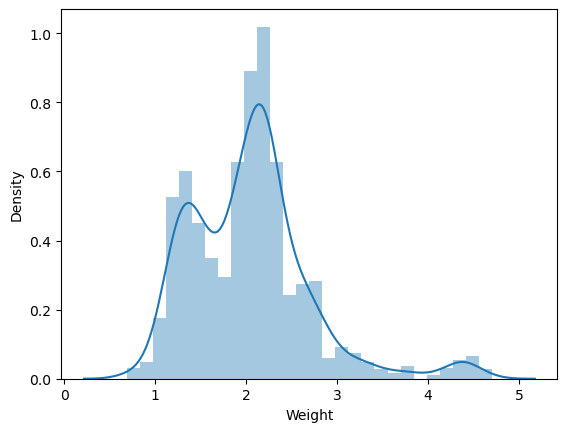

In [217]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

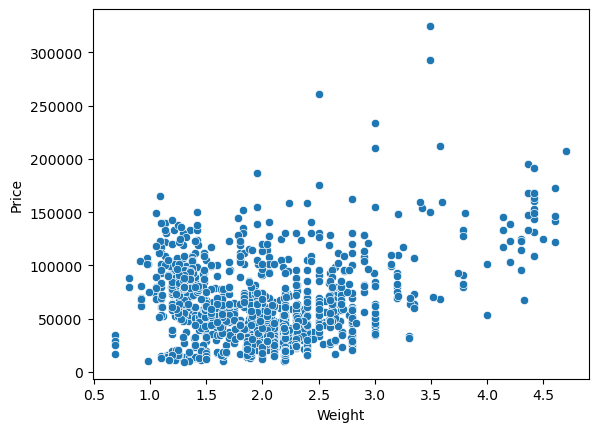

In [218]:
sns.scatterplot(x=df['Weight'], y= df['Price'])

<Axes: >

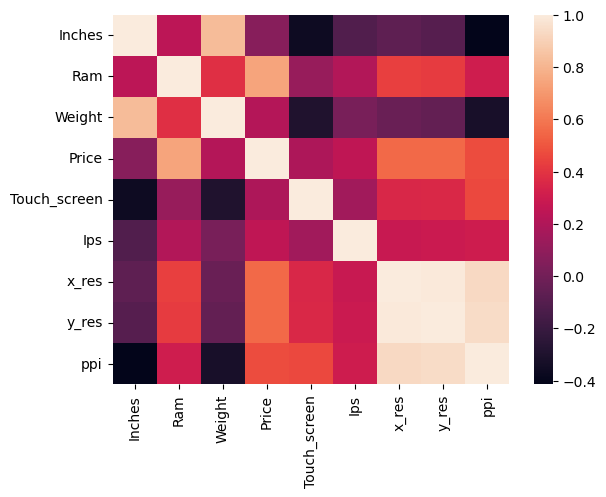

In [219]:

sns.heatmap(numeric_df.corr())

/var/folders/d6/qb76rn9134795g1p3g8gwrf00000gn/T/ipykernel_1499/4215048856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

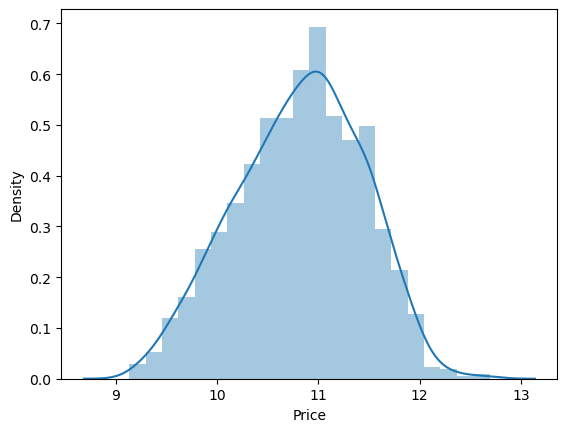

In [220]:
# sns.distplot(df['Price'])
sns.distplot(np.log(df['Price']))

In [240]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [241]:
X

,Company,TypeName,Cpu,Ram,Memory,Weight,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,1.37,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,1.34,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,1.86,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,1.83,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,1.37,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,1.80,1,1,157.350512,Intel Core i7,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,1.30,1,1,276.053530,Intel Core i7,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,1.50,0,0,111.935204,Intel Celeron Dual,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,2.19,0,0,100.454670,Intel Core i7,Intel Core i7,1000,0,AMD,Windows


In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [239]:
# X_train.drop(columns = ['Memory'], inplace = True)
X_train

,Company,TypeName,Ram,Weight,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand,HDD,SSD,Gpu_Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel Celeron Dual,Other Intel Processor,0,0,Intel,Others/No Os/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD A10-Series 9620P,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,2000,0,Nvidia,Others/No Os/Linux


In [224]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [225]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Linear Regression

In [245]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown = 'ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name', 'Cpu_brand','Gpu_Brand', 'HDD','os'])
], remainder='passthrough')


step2 = LinearRegression()

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))


R2 Score 0.8485093349054039
MAE 0.19308938302498185


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Ridge Regression

In [246]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8402083864069613
MAE 0.1982977792495248


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Lasso Regression

In [247]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8380363799186072
MAE 0.19965425934666997


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


 # K nearest Neighbors

In [248]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8220340603687818
MAE 0.1927364422030487


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Decision Tree Regressor

In [249]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8422357746393818
MAE 0.18229881715470778


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### SVM 

In [250]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = SVR(kernel = 'rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.7661334347101557
MAE 0.18661474002941705


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Random Forest Regressor

In [257]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, 
                              random_state=3,
                              max_samples = 0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8882929938524207
MAE 0.15930553641426576


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Ada Boost

In [252]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators = 15, learning_rate = 0.1)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.7632853207965817
MAE 0.24356377179434713


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Gradient Boost

In [253]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips','Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators = 500)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8846195908474538
MAE 0.15923485404448448


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# XG boost

In [254]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     ['Company', 'TypeName', 'Ips', 'Cpu_name','Gpu_Brand', 'Cpu_brand', 'os','HDD'])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators = 45, max_depth = 5, learning_rate = 0.5)

pipe = Pipeline([
            ('step1',step1),
            ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Score 0.8751194811482367
MAE 0.15758695991427696


/Users/syedowez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [255]:
# X_train.drop(columns = ['Cpu', 'Memory', 'Cpu_name'], inplace = True)
X_train

,Company,TypeName,Ram,Weight,Touch_screen,Ips,ppi,Cpu_name,Cpu_brand,HDD,SSD,Gpu_Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel Celeron Dual,Other Intel Processor,0,0,Intel,Others/No Os/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD A10-Series 9620P,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,2000,0,Nvidia,Others/No Os/Linux


# Importing the Model 

In [258]:
import pickle 
pickle.dump(df, open('df.pkl','wb')) 
pickle.dump(pipe, open('pipe.pkl','wb'))